In [5]:
import cv2 as cv
import numpy as np
from matplotlib import image, pyplot as plt

In [26]:
img = cv.imread("10.jpeg")
resized = cv.resize(img, (600,400))
rgb = cv.cvtColor(resized,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)
_,bin = cv.threshold(gray,47,255,cv.THRESH_BINARY)

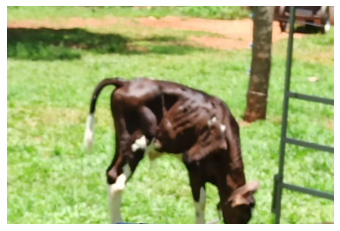

(400, 600, 3)


In [27]:
cv.imwrite("OriginalRedm.jpg", resized)
plt.imshow(rgb)
plt.axis(False)
plt.show()
print(rgb.shape)

In [95]:
kernel = np.ones((3,3), np.uint8)
closing = cv.morphologyEx(bin,cv.MORPH_CLOSE,kernel, iterations = 1)

In [96]:
bg = cv.dilate(closing,kernel,iterations=3)

In [97]:
dist = cv.distanceTransform(bg,cv.DIST_L2,3)

In [98]:
_,fg = cv.threshold(dist,0.2*dist.max(),255,0)

In [99]:
fg = np.uint8(fg)

In [100]:
unknown = cv.subtract(bg,fg)

In [101]:
_, marker = cv.connectedComponents(fg)
marker = marker+1
marker[unknown == 255] = 0
marker = cv.watershed(resized,marker)

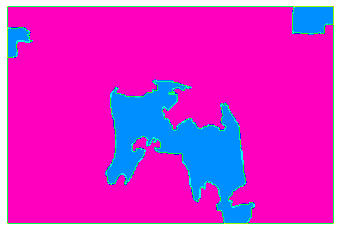

In [102]:
plt.imshow(marker, cmap='gist_rainbow')
plt.axis(False)
plt.show()